In [95]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure 
import operator
import gmaps
from operator import itemgetter
from heapq import nlargest
pd.options.mode.chained_assignment = None  # default='warn'
import collections.abc
#the  following aliasesrequired for gmaps.marker_layer collections.iterable to work
collections.Iterable = collections.abc.Iterable

# Import API key
#from api_keys import g_key

import wbgapi as wb


In [96]:
#Australia Total population from 2010 to 2020
cnt_pop_df = wb.data.DataFrame('SP.POP.TOTL', ['AUS'], time=range(2010, 2021, 1), labels=True, skipAggs=False)
cnt_pop_df = cnt_pop_df.fillna(0)
#Converting rows to columns
pop_count_df = pd.melt(cnt_pop_df, id_vars= None, 
        var_name="Year", 
        value_name="Total Population", ignore_index=True)


pop_count_df = pop_count_df.iloc[1: , :]
#Removing YR from Year value
pop_count_df['Year'] = pop_count_df['Year'].map(lambda x: x.lstrip('YR'))
#Converting totalpopulation value into integer
pop_count_df['Total Population'] = pop_count_df['Total Population'].astype(int)
pop_count_df


,Year,Total Population
1,2010,22031750
2,2011,22340024
3,2012,22733465
4,2013,23128129
5,2014,23475686
6,2015,23815995
7,2016,24190907
8,2017,24601860
9,2018,24982688
10,2019,25365745


In [97]:
#Calculating change over percentage of Australia population growth from 2010 to 2020
pop_count_df.iloc[:, 1:] = (pop_count_df.iloc[:, 1:] - pop_count_df.iloc[0, 1:].values.squeeze()).div(pop_count_df.iloc[:, 1:])
c_pop_count_df = pop_count_df.loc[1:]

c_pop_count_df.rename(columns = {'Total Population':'Change Over Percentage'}, inplace = True)
#Rounding decimal value to 2 digits 
c_pop_count_df['Change Over Percentage']=c_pop_count_df['Change Over Percentage'].apply(lambda x:round(x,2))
c_pop_count_df = c_pop_count_df.reset_index(drop=True)
c_pop_count_df

,Year,Change Over Percentage
0,2010,0.00
1,2011,0.01
2,2012,0.03
3,2013,0.05
4,2014,0.06
5,2015,0.07
6,2016,0.09
7,2017,0.10
8,2018,0.12
9,2019,0.13


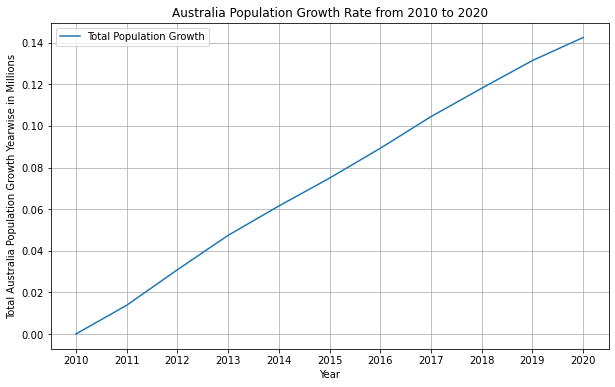

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(pop_count_df['Year'], pop_count_df['Total Population'], label="Total Population Growth") 
 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Total Australia Population Growth Yearwise in Millions')

plt.title('Australia Population Growth Rate from 2010 to 2020')
plt.grid()
plt.show()

In [100]:
#Total world population growth  from 2010 to 2020
world_pop_df = wb.data.DataFrame('SP.POP.GROW', ['ALL'], time=range(2010, 2021, 1), labels=True, skipAggs=False)
#Null values fill with zero
world_pop_df = world_pop_df.fillna(0)
#Sum of total world popultion based on all countries
world_pop_df.loc['total'] =  world_pop_df.select_dtypes(pd.np.number).sum()

world_population_df = world_pop_df.iloc[-1:]
#NULL value replaced with World population in country column
world_population_yearwise_df = world_population_df.fillna('World Population')
world_population_yearwise_df

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
total,World Population,374.948626,355.167505,359.895208,357.020575,350.146286,344.133103,339.732863,332.346492,325.626555,323.625571,311.998041


In [101]:
#World population values and Year value from Row to Columns
world_pop_count_df = pd.melt(world_population_yearwise_df, id_vars= None, 
        var_name="Year", 
        value_name="World Population", ignore_index=True)


world_pop_count_df = world_pop_count_df.iloc[1: , :]
#Removing YR from Year value
world_pop_count_df['Year'] = world_pop_count_df['Year'].map(lambda x: x.lstrip('YR'))
world_pop_count_df

,Year,World Population
1,2010,374.948626
2,2011,355.167505
3,2012,359.895208
4,2013,357.020575
5,2014,350.146286
6,2015,344.133103
7,2016,339.732863
8,2017,332.346492
9,2018,325.626555
10,2019,323.625571


In [102]:
#World population and growth percentage for last 10 years
world_population_growth_file = "Resources/world_population_growth.csv"
world_population_growth_df = pd.read_csv(world_population_growth_file)
world_population_growth_df

,Year,World Population,Yearly Change In Percentage,Net Change,Density_PKM,Urban Pop,Urban Pop In Percentage
0,2010,6956823603,1.22,84056510,47,3594868146,52
1,2011,7041194301,1.21,84370698,47,3671423872,52
2,2012,7125828059,1.20,84633758,48,3747842586,53
3,2013,7210581976,1.19,84753917,48,3824990329,53
4,2014,7295290765,1.17,84708789,49,3902831934,53
5,2015,7379797139,1.16,84506374,50,3981497663,54
6,2016,7464022049,1.14,84224910,50,4060652683,54
7,2017,7547858925,1.12,83836876,51,4140188594,55
8,2018,7631091040,1.10,83232115,51,4219817318,55
9,2019,7713468100,1.08,82377060,52,4299438618,56


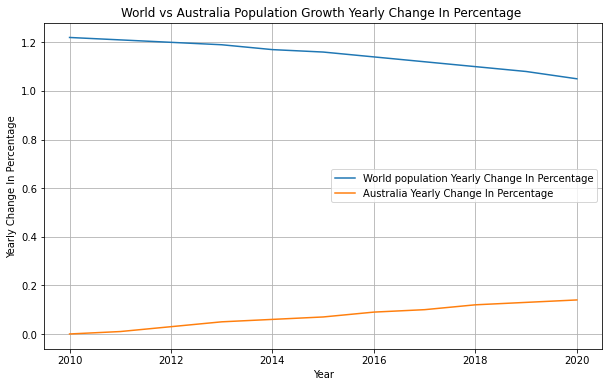

In [103]:
#World vs Australia Population growth from 2010 to 2020
plt.figure(figsize=(10, 6))
plt.plot(world_population_growth_df['Year'], world_population_growth_df['Yearly Change In Percentage'], label="World population Yearly Change In Percentage") 
plt.plot(world_population_growth_df['Year'], c_pop_count_df['Change Over Percentage'], label="Australia Yearly Change In Percentage")  
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Yearly Change In Percentage')

plt.title('World vs Australia Population Growth Yearly Change In Percentage ')
plt.grid()
plt.show()

In [104]:
Australia_population_2020_file = "Resources/Australia_population_2020.csv"
Australia_population_2020_df = pd.read_csv(Australia_population_2020_file)
australia_overseas_vs_aus_born_df = Australia_population_2020_df.tail(2)
australia_overseas_vs_aus_born_df

,Country of birth(b),Percentage
10,All overseas-born,29.8
11,Australian-born,70.2


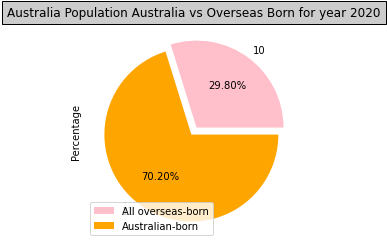

In [105]:
colors = ['pink', 'orange']

explode = (0.05, 0.05)
  
# Plotting the pie chart for above dataframe
australia_overseas_vs_aus_born_df.plot(
    kind='pie', y='Percentage', 
  autopct='%1.2f%%', colors=colors, explode=explode)
plt.legend(australia_overseas_vs_aus_born_df['Country of birth(b)'], loc="best")
plt.title("Australia Population Australia vs Overseas Born for year 2020", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [60]:
historical_population_file = "Resources/historical_population_yearwise.csv"
historical_population_df = pd.read_csv(historical_population_file)
historical_population_df

,Year,Total Growth,Natural increase,Net overseas migration,Zero Line
0,2010,1325678,644081,761477,0
1,2011,1291032,623285,753801,0
2,2012,1572603,638448,931319,0
3,2013,1552788,645513,897384,0
4,2014,1395970,627564,756049,0
5,2015,1365365,605671,736070,0
6,2016,1533393,613713,875547,0
7,2017,1611578,582646,1024023,0
8,2018,1546863,576102,970761,0
9,2019,1546582,564920,981662,0


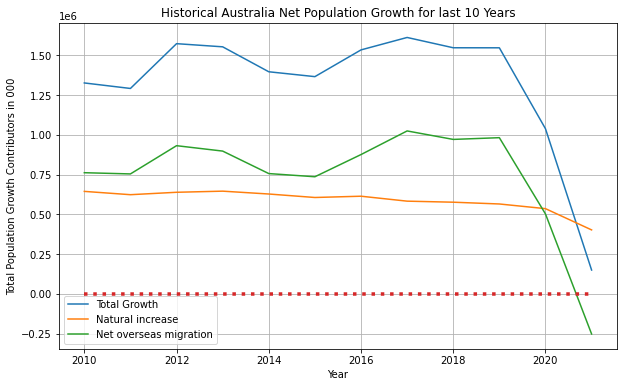

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(historical_population_df['Year'], historical_population_df['Total Growth'], label="Total Growth") 
plt.plot(historical_population_df['Year'], historical_population_df['Natural increase'], label="Natural increase") 
plt.plot(historical_population_df['Year'], historical_population_df['Net overseas migration'], label="Net overseas migration")
plt.plot(historical_population_df['Year'], historical_population_df['Zero Line'],linestyle= 'dotted',  linewidth=3.5) 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Total Population Growth Contributors in 000')

plt.title('Historical Australia Net Population Growth for last 10 Years')
plt.grid()
plt.show()

In [106]:
world_immigration_emmigration_2020_file = "Resources/world_immigration_emmigration_2020.csv"
world_immigration_emmigration_2020_df = pd.read_csv(world_immigration_emmigration_2020_file)
world_immigration_emmigration_2020_df.sort_values(by=['immigrants'], ascending=False)
top_10_immi_emmi_countries_df = world_immigration_emmigration_2020_df.head(10)
top_10_immi_emmi_countries_df

,country,immigrants,percPop,emigrants
0,United States,50632836,15.28,2996223
1,Germany,15762457,18.81,3855268
2,Saudi Arabia,13454842,38.65,299268
3,Russia,11636911,7.97,10756697
4,United Kingdom,9359587,13.79,4732510
5,United Arab Emirates,8716332,88.13,203214
6,France,8524876,13.06,2341908
7,Canada,8049323,21.33,1292329
8,Australia,7685860,30.14,598765
9,Spain,6842202,14.63,1489823


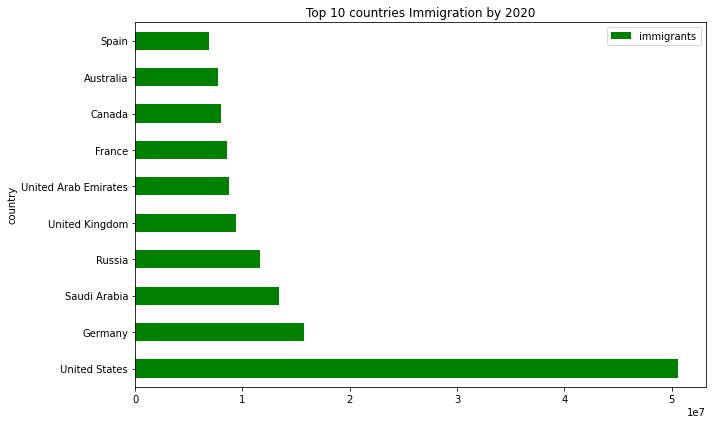

In [107]:
top_10_immi_emmi_countries_df.plot.barh(x='country', y='immigrants',
             title='Top 10 countries Immigration by 2020', figsize = (10, 6), color='green')
plt.tight_layout()

In [62]:
Australia_Migration_file = "Resources/Australia_Migration.csv"
Australia_Migration_df = pd.read_csv(Australia_Migration_file)
Australia_Migration_df

,Year,Net overseas migration,zero line
0,2010,196.06,0
1,2011,180.37,0
2,2012,231.95,0
3,2013,230.33,0
4,2014,187.78,0
5,2015,184.03,0
6,2016,206.23,0
7,2017,263.35,0
8,2018,238.22,0
9,2019,241.34,0


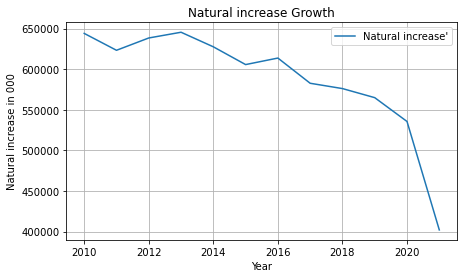

In [65]:
plt.figure(figsize=(7, 4))
plt.plot(historical_population_df['Year'], historical_population_df['Natural increase'], label="Natural increase'") 
#plt.plot(historical_population_df['Year'], historical_population_df['zero line'],linestyle= 'dotted') 

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Natural increase in 000')


plt.title('Natural increase Growth')
plt.grid()
plt.show()

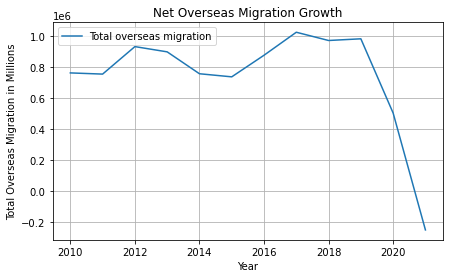

In [71]:
plt.figure(figsize=(7, 4))
plt.plot(historical_population_df['Year'], historical_population_df['Net overseas migration'], label="Total overseas migration") 
#plt.plot(historical_population_df['Year'], historical_population_df['zero line'],linestyle= 'dotted') 

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Total Overseas Migration in Millions')


plt.title('Net Overseas Migration Growth')
plt.grid()
plt.show()

In [38]:
top_10_countries_migration_file = "Resources/top_10_countries_migration.csv"
top_10_countries_migration_df = pd.read_csv(top_10_countries_migration_file)
top_10_countries_migration_df


,Country,2010,2015,2020
0,England,985.09,1006.54,980.36
1,India,329.51,449.04,721.05
2,China(c),371.55,508.87,650.64
3,New Zealand,517.78,575.43,564.84
4,Philippines,183.77,241.13,310.05
5,Vietnam,203.77,235.59,270.34
6,South Africa,155.95,177.39,200.24
7,Italy,204.69,198.51,177.84
8,Malaysia,129.88,143.42,177.46
9,Sri Lanka,96.48,119.70,146.95


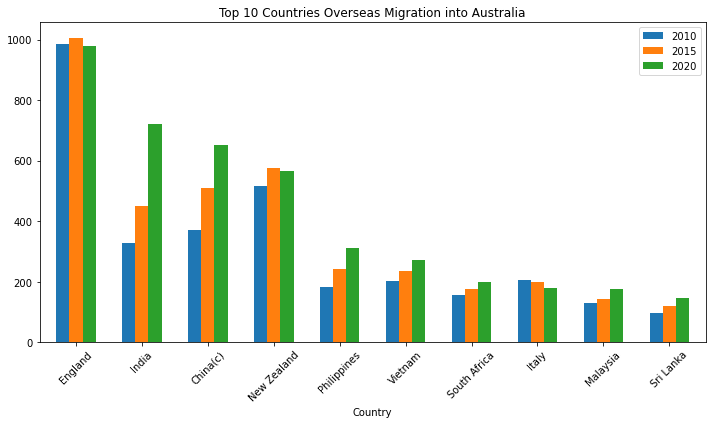

In [40]:
top_10_countries_migration_df.plot.bar(x='Country', figsize = (10, 6), width = 0.6, rot=45, title='Top 10 Countries Overseas Migration into Australia');
plt.tight_layout()

In [190]:
Births_registered_file = "Resources/Births_registered_yearwise.csv"

Births_registered_df = pd.read_csv(Births_registered_file)
Births_registered_df

,Year,Births registered
0,2010,303318
1,2011,301617
2,2012,309582
3,2013,308065
4,2014,299697
5,2015,305377
6,2016,311104
7,2017,309142
8,2018,315147
9,2019,305832


In [191]:
Deaths_registered_yearwise_file = "Resources/Deaths_registered_yearwise.csv"
Deaths_registered_yearwise_df = pd.read_csv(Deaths_registered_yearwise_file)
Deaths_registered_yearwise_df

,Year,Males,Females,Deaths Registered
0,2010,73484,69989,143473
1,2011,75330,71602,146932
2,2012,74794,72304,147098
3,2013,75782,71896,147678
4,2014,78341,75239,153580
5,2015,81330,77722,159052
6,2016,81867,76637,158504
7,2017,"82,858",78051,160909
8,2018,82320,76173,158493
9,2019,88346,80955,169301


<IPython.core.display.Javascript object>


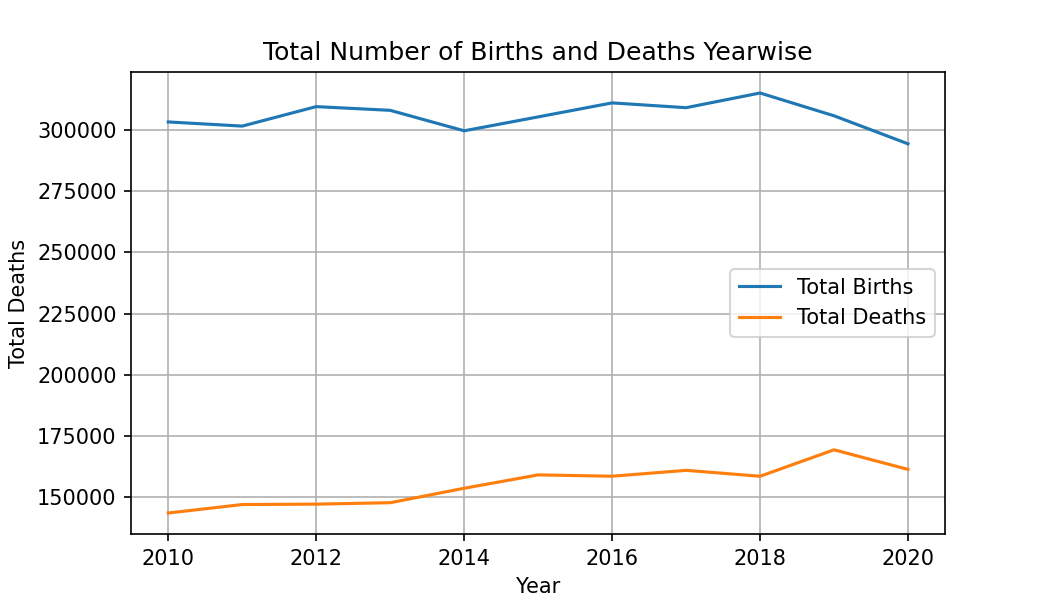

In [192]:
plt.figure(figsize=(7, 4))
plt.plot(Births_registered_df['Year'], Births_registered_df['Births registered'], label="Total Births") 
plt.plot(Deaths_registered_yearwise_df['Year'], Deaths_registered_yearwise_df['Deaths Registered'], label="Total Deaths") 
 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.ylabel('Total Deaths')

plt.title('Total Number of Births and Deaths Yearwise')
plt.grid()
plt.show()

In [193]:
Leading_causes_of_death_yearwise_file = "Resources/Leading_causes_of_death_yearwise.csv"
Leading_causes_of_death_yearwise_df = pd.read_csv(Leading_causes_of_death_yearwise_file)
Leading_causes_of_death_yearwise_df


,Year,Ischaemic heart diseases,"Dementia, including Alzheimer's disease",Cerebrovascular diseases,"Malignant neoplasm of trachea, bronchus and lung",Chronic lower respiratory diseases
0,2010,84.8,33.8,43.2,33.6,24.6
1,2011,81.2,35.8,42.0,32.6,25.6
2,2012,73.5,36.3,39.1,31.9,25.2
3,2013,70.2,37.2,37.0,31.3,26.4
4,2014,69.7,39.4,36.6,30.6,28.0
5,2015,67.0,40.5,35.9,30.7,27.8
6,2016,62.8,40.9,34.0,29.6,27.2
7,2017,59.8,41.6,32.2,28.0,27.6
8,2018,54.6,41.2,30.7,28.4,25.1
9,2019,55.5,43.0,29.6,28.3,25.9


<IPython.core.display.Javascript object>


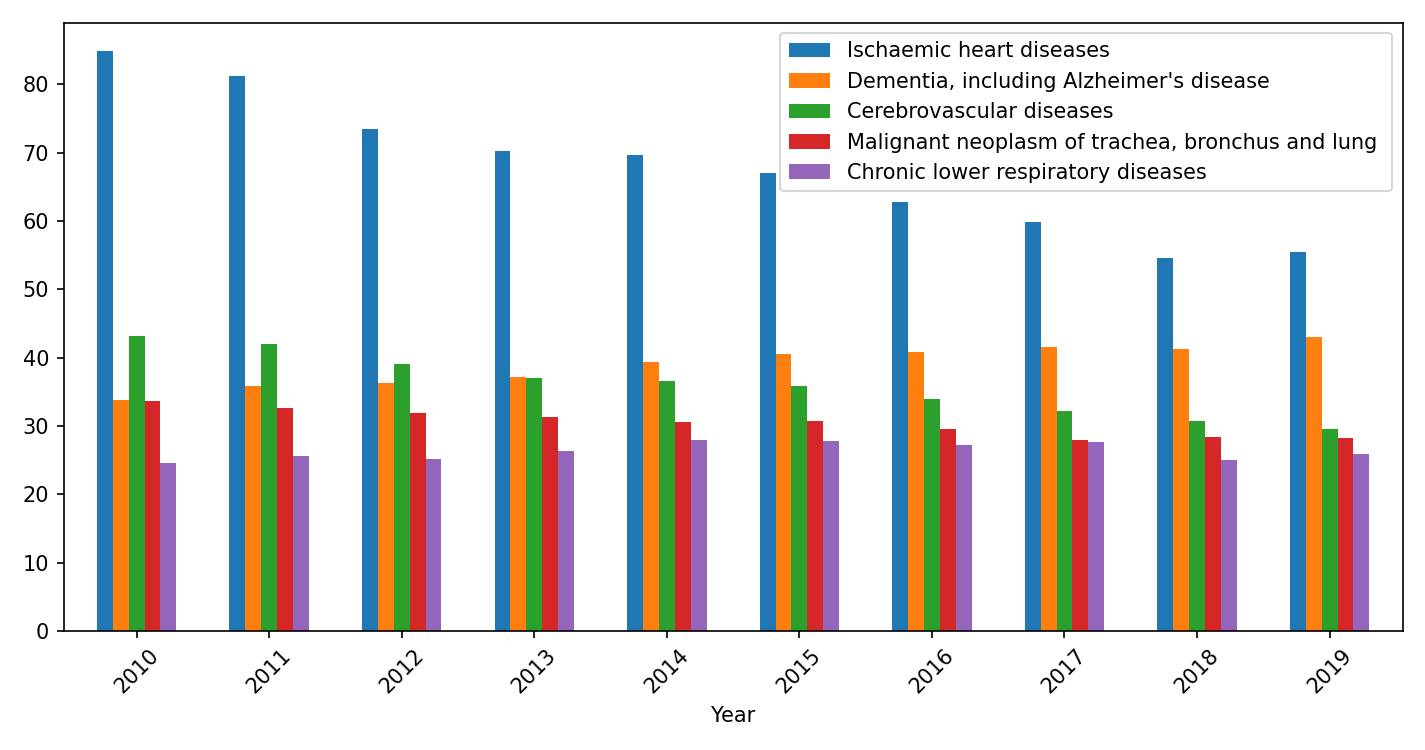

In [194]:
Leading_causes_of_death_yearwise_df.plot.bar(x='Year', figsize = (9.5, 5), width = 0.6, rot=45);
plt.tight_layout()

In [195]:
Projected_population_file = "Resources/Projected_population_australia.csv"
Projected_population_df = pd.read_csv(Projected_population_file)
Projected_population_df

,Year,High series,Medium series,Low series,Zero net overseas migration
0,2021,26402046,26301274,26200811,25190067
1,2022,26873947,26727025,26582009,25325761
2,2023,27349900,27147199,26949969,25454972
3,2024,27829520,27562195,27303910,25576973
4,2025,28311405,27970435,27643086,25691129
5,2026,28796151,28372315,27966732,25796865
6,2027,29283507,28765734,28273607,25893232
7,2028,29773492,29157085,28575391,25979797
8,2029,30264147,29545877,28872946,26056317
9,2030,30755046,29931725,29165889,26122837


<IPython.core.display.Javascript object>


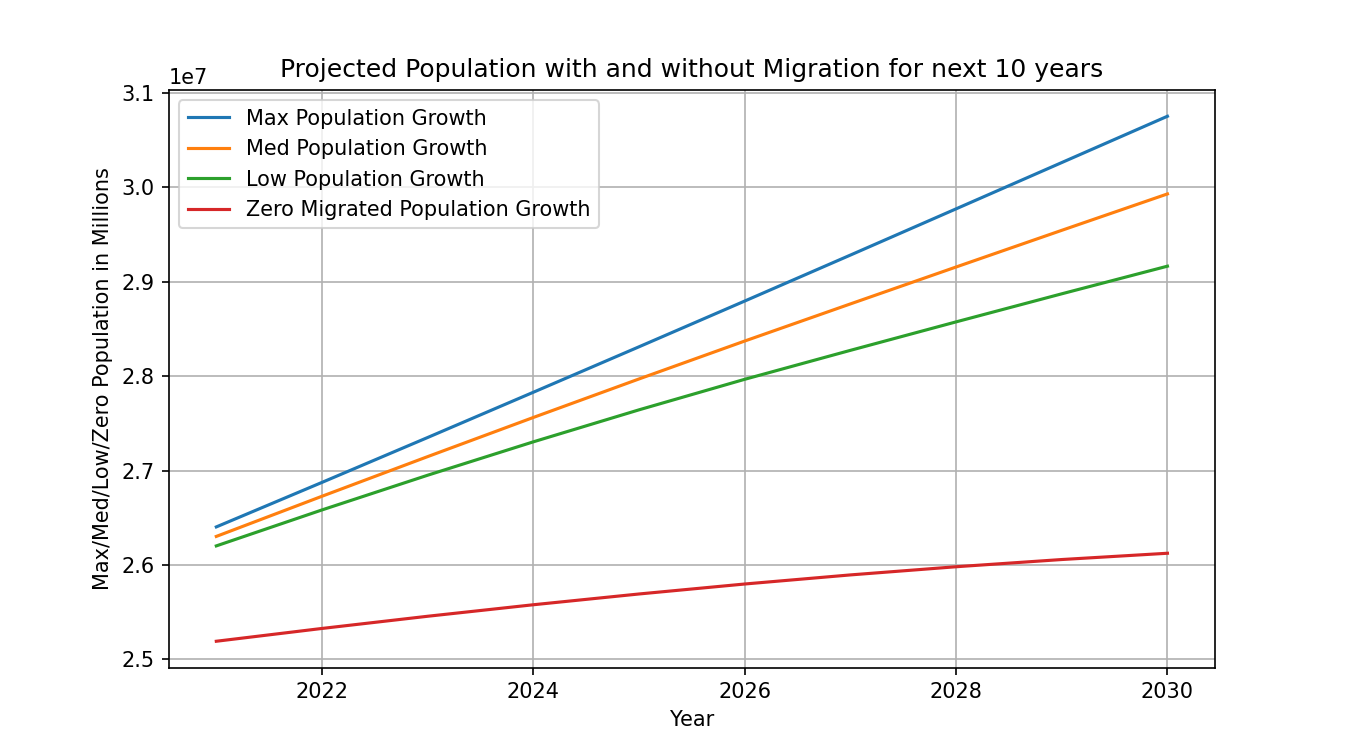

In [196]:
plt.figure(figsize=(9, 5))
plt.plot(Projected_population_df['Year'], Projected_population_df['High series'], label="Max Population Growth") 
plt.plot(Projected_population_df['Year'], Projected_population_df['Medium series'], label="Med Population Growth") 
plt.plot(Projected_population_df['Year'], Projected_population_df['Low series'], label="Low Population Growth")
plt.plot(Projected_population_df['Year'], Projected_population_df['Zero net overseas migration'], label="Zero Migrated Population Growth")
 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Max/Med/Low/Zero Population in Millions')

plt.title('Projected Population with and without Migration for next 10 years')
plt.grid()
plt.show()

In [197]:
projected_population_migration_file = "Resources/Contribution _of_overseas_migration_projected_population.csv"
projected_population_migration_df = pd.read_csv(projected_population_migration_file)
projected_population_migration_df

,Year,High series,Medium series,Low series
0,2021,1124000,1057000,990000
1,2022,1410000,1315000,1220000
2,2023,1694000,1566000,1439000
3,2024,1976000,1811000,1647000
4,2025,2255000,2049000,1844000
5,2026,2532000,2281000,2030000
6,2027,2807000,2506000,2205000
7,2028,3082000,2731000,2380000
8,2029,3357000,2956000,2555000
9,2030,3632000,3181000,2730000


<IPython.core.display.Javascript object>


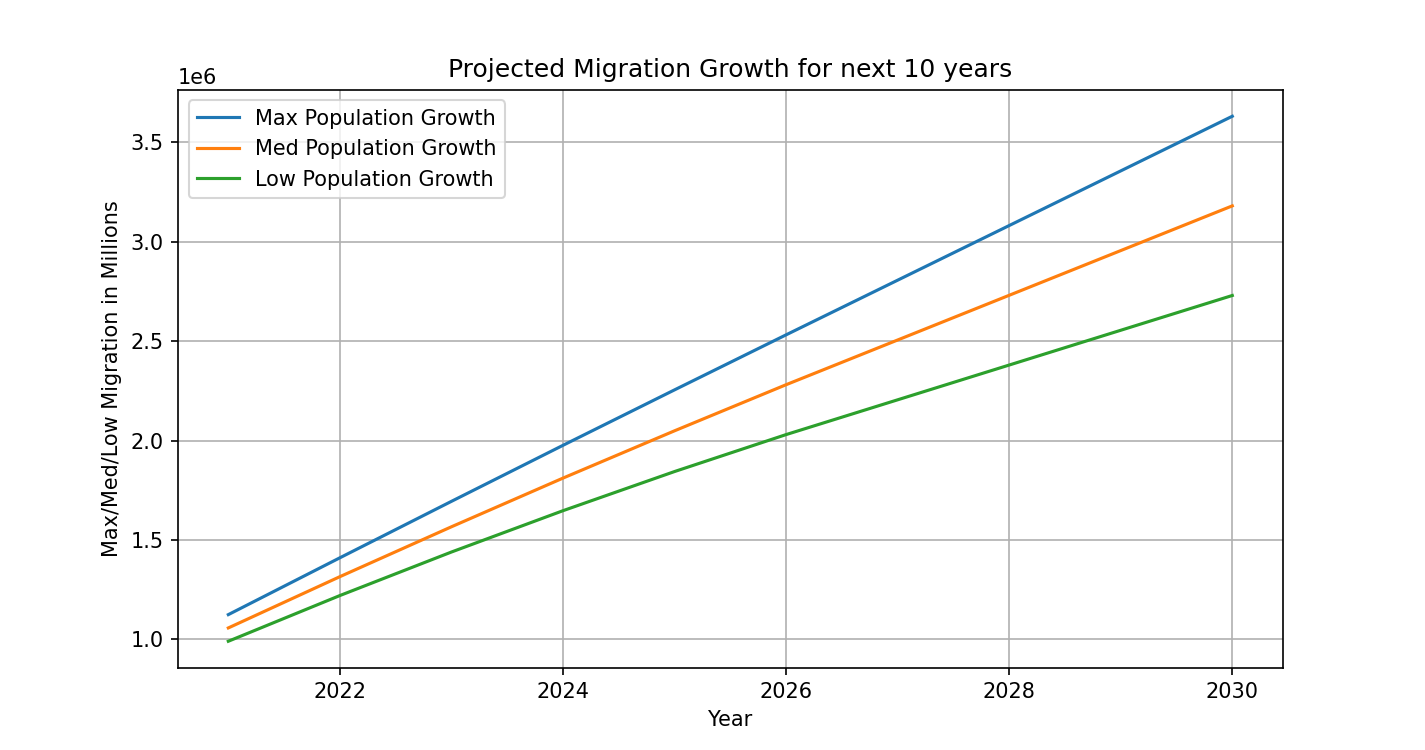

In [198]:
plt.figure(figsize=(9.5, 5))
plt.plot(projected_population_migration_df['Year'], projected_population_migration_df['High series'], label="Max Population Growth") 
plt.plot(projected_population_migration_df['Year'], projected_population_migration_df['Medium series'], label="Med Population Growth") 
plt.plot(projected_population_migration_df['Year'], projected_population_migration_df['Low series'], label="Low Population Growth")
 
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Max/Med/Low Migration in Millions')

plt.title('Projected Migration Growth for next 10 years')
plt.grid()
plt.show()

In [88]:
Aus_Historical_GDP_Per_Capita_file = "Resources/Historical_GDP_Per_Capita.csv"
Aus_Historical_GDP_Per_Capita_df = pd.read_csv(Aus_Historical_GDP_Per_Capita_file)
Aus_Historical_GDP_Per_Capita_df

,Year,Annual Growth Rate,Zero
0,2010,21.63,0
1,2011,20.18,0
2,2012,8.79,0
3,2013,0.20,0
4,2014,-8.27,0
5,2015,-9.21,0
6,2016,-11.95,0
7,2017,8.12,0
8,2018,6.16,0
9,2019,-4.01,0


In [83]:
#Total world GDP per Capita growth  from 2010 to 2020
world_gdp_p_capita_df = wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', ['ALL'], time=range(2010, 2021, 1), labels=True, skipAggs=False)
world_gdp_p_capita_df = world_gdp_p_capita_df.fillna(0)
world_gdp_p_capita_df.loc['total'] =  world_gdp_p_capita_df.select_dtypes(pd.np.number).sum()

world_gdp_p_capita_df = world_gdp_p_capita_df.iloc[-1:]
world_gdp_p_capita_yearwise_df = world_gdp_p_capita_df.fillna('World GDP Per Capita')
world_gdp_p_capita_yearwise_df

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
total,World GDP Per Capita,771.847578,579.885893,461.350147,463.702761,497.540295,352.061229,455.819446,486.864687,462.232891,385.067287,-1415.984782


In [84]:
world_gdp_p_capita_count_df = pd.melt(world_gdp_p_capita_yearwise_df, id_vars= None, 
        var_name="Year", 
        value_name="World GDP Per Capita", ignore_index=True)

world_gdp_p_capita_count_df = world_gdp_p_capita_count_df.iloc[1: , :]
world_gdp_p_capita_count_df['Year'] = world_gdp_p_capita_count_df['Year'].map(lambda x: x.lstrip('YR'))
world_gdp_p_capita_count_df

,Year,World GDP Per Capita
1,2010,771.847578
2,2011,579.885893
3,2012,461.350147
4,2013,463.702761
5,2014,497.540295
6,2015,352.061229
7,2016,455.819446
8,2017,486.864687
9,2018,462.232891
10,2019,385.067287


In [85]:
world_gdp_p_capita_count_df.iloc[:, 1:] = (world_gdp_p_capita_count_df.iloc[:, 1:] - world_gdp_p_capita_count_df.iloc[0, 1:].values.squeeze()).div(world_gdp_p_capita_count_df.iloc[:, 1:])
world_gdp_p_capita_percentage_df = world_gdp_p_capita_count_df.loc[1:]

world_gdp_p_capita_percentage_df.rename(columns = {'World GDP Per Capita':'World GDP Change Over Percentage'}, inplace = True)
world_gdp_p_capita_percentage_df['World GDP Change Over Percentage']=world_gdp_p_capita_percentage_df['World GDP Change Over Percentage'].apply(lambda x:round(x,2))
world_gdp_p_capita_percentage_df = world_gdp_p_capita_percentage_df.reset_index(drop=True)
world_gdp_p_capita_percentage_df

,Year,World GDP Change Over Percentage
0,2010,0.00
1,2011,-0.33
2,2012,-0.67
3,2013,-0.66
4,2014,-0.55
5,2015,-1.19
6,2016,-0.69
7,2017,-0.59
8,2018,-0.67
9,2019,-1.00


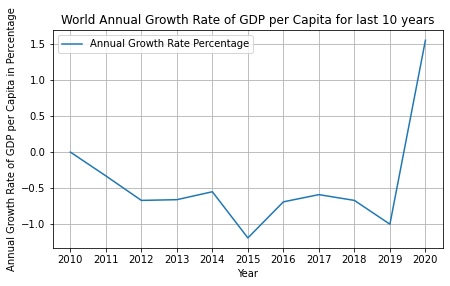

In [94]:
plt.figure(figsize=(7, 4))
plt.plot(world_gdp_p_capita_percentage_df['Year'], world_gdp_p_capita_percentage_df['World GDP Change Over Percentage'], label="Annual Growth Rate Percentage") 
#plt.plot(world_gdp_p_capita_percentage_df['Year'], world_gdp_p_capita_percentage_df['Zero'],linestyle= 'dotted') 

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate of GDP per Capita in Percentage')


plt.title('World Annual Growth Rate of GDP per Capita for last 10 years')
plt.grid()
plt.show()

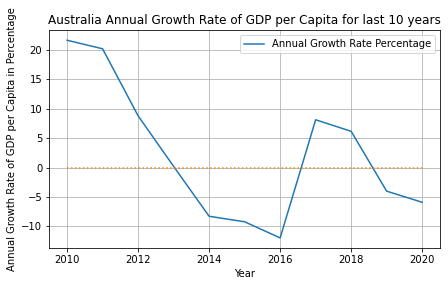

In [89]:
plt.figure(figsize=(7, 4))
plt.plot(Aus_Historical_GDP_Per_Capita_df['Year'], Aus_Historical_GDP_Per_Capita_df['Annual Growth Rate'], label="Annual Growth Rate Percentage") 
plt.plot(Aus_Historical_GDP_Per_Capita_df['Year'], Aus_Historical_GDP_Per_Capita_df['Zero'],linestyle= 'dotted') 

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate of GDP per Capita in Percentage')


plt.title('Australia Annual Growth Rate of GDP per Capita for last 10 years')
plt.grid()
plt.show()

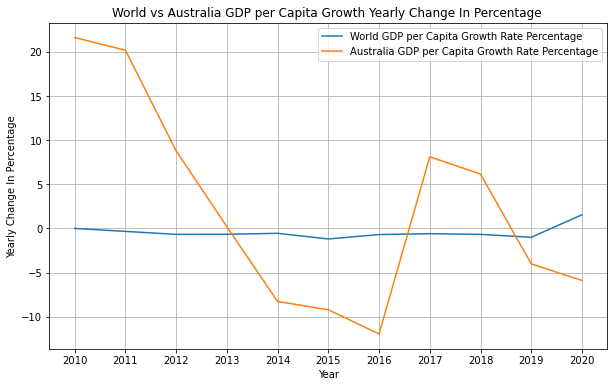

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(world_gdp_p_capita_percentage_df['Year'], world_gdp_p_capita_percentage_df['World GDP Change Over Percentage'], label="World GDP per Capita Growth Rate Percentage") 
plt.plot(world_gdp_p_capita_percentage_df['Year'], Aus_Historical_GDP_Per_Capita_df['Annual Growth Rate'], label="Australia GDP per Capita Growth Rate Percentage")   
plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Yearly Change In Percentage')

plt.title('World vs Australia GDP per Capita Growth Yearly Change In Percentage ')
plt.grid()
plt.show()

In [108]:
#Top 10 countries based on immigration for year 2020
world_immigration_emmigration_2020_file = "Resources/world_immigration_emmigration_2020.csv"
world_immigration_emmigration_2020_df = pd.read_csv(world_immigration_emmigration_2020_file)
world_immigration_emmigration_2020_df.sort_values(by=['immigrants'], ascending=False)
top_10_immi_emmi_countries_df = world_immigration_emmigration_2020_df.head(10)

top_10_immi_emmi_countries_df.rename(columns = {'country':'Country'}, inplace = True)
top_10_immi_emmi_countries_df

,Country,immigrants,percPop,emigrants
0,United States,50632836,15.28,2996223
1,Germany,15762457,18.81,3855268
2,Saudi Arabia,13454842,38.65,299268
3,Russia,11636911,7.97,10756697
4,United Kingdom,9359587,13.79,4732510
5,United Arab Emirates,8716332,88.13,203214
6,France,8524876,13.06,2341908
7,Canada,8049323,21.33,1292329
8,Australia,7685860,30.14,598765
9,Spain,6842202,14.63,1489823


In [109]:
#Total world GDP per Capita growth  from 2010 to 2020
world_gdp_p_capita_df = wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', ['ALL'], time=range(2010, 2021, 1), labels=True, skipAggs=False)
world_gdp_p_capita_df = world_gdp_p_capita_df.fillna(0)
world_gdp_p_capita_df

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
ZWE,Zimbabwe,18.065883,12.452840,14.701077,0.192474,0.596149,0.100575,-0.793105,3.192453,3.356166,-7.468627,-7.620388
ZMB,Zambia,7.129809,2.423884,4.310199,1.809749,1.480580,-0.187950,0.706659,0.494086,1.048034,-1.451364,-5.550283
YEM,"Yemen, Rep.",4.732905,-15.107919,-0.391864,2.014175,-2.802862,-29.827145,-11.611137,-7.345180,-1.594564,0.000000,0.000000
PSE,West Bank and Gaza,3.065654,6.867835,3.510367,2.214850,-2.471026,1.372585,6.446661,-0.577623,-1.304814,-1.151614,-13.631959
VIR,Virgin Islands (U.S.),0.640017,-8.147451,-14.732185,-6.157647,-1.629762,-0.267922,1.786071,-0.517854,1.853135,2.531674,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
CEB,Central Europe and the Baltics,2.066327,3.309231,0.994461,1.455564,3.199940,4.187467,3.334102,5.138007,4.696620,4.214347,-3.601012
CSS,Caribbean small states,0.663819,0.431629,0.616752,-0.091945,-0.002706,0.386837,-1.783749,-0.534163,1.263454,0.039176,-8.666040
ARB,Arab World,2.337697,1.443764,2.700096,0.725441,0.389028,0.888158,1.152959,-1.006358,0.468786,0.137964,-7.065182


In [110]:
m = world_gdp_p_capita_df.Country.isin(top_10_immi_emmi_countries_df.Country)
world_gdp_p_capita_df = world_gdp_p_capita_df[m]
world_gdp_p_capita_df

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,
USA,United States,1.716400,0.815453,1.502188,1.138897,1.776838,2.319441,0.977013,1.687321,2.455679,1.697011,-4.328620
GBR,United Kingdom,1.333971,0.667756,0.766761,1.209900,2.235458,1.812662,1.491364,1.442929,1.036855,1.099996,-9.906993
ARE,United Arab Emirates,-5.914931,2.186344,2.257099,4.409938,4.225677,4.507818,1.905206,1.011431,-0.320590,1.934431,-7.272173
ESP,Spain,-0.297089,-1.166193,-3.022425,-1.111899,1.687450,3.915768,2.944349,2.732361,1.841758,1.355133,-11.253267
SAU,Saudi Arabia,2.008882,6.704353,2.203300,-0.366653,0.753967,1.477060,-0.603770,-2.713827,0.605723,-1.325032,-5.608695
DEU,Germany,4.339607,5.869636,0.230161,0.163871,1.784342,0.617105,1.408102,2.297206,0.782690,0.827865,-4.647545
FRA,France,1.447008,1.699613,-0.171207,0.059916,0.479078,0.754024,0.829057,1.994998,1.585879,1.620358,-8.034379
CAN,Canada,1.949628,2.142309,0.663248,1.253614,1.841026,-0.089286,-0.135843,1.811279,1.335564,0.426918,-6.319222
AUS,Australia,0.595354,1.055748,2.118897,0.849417,1.044490,0.712256,1.149347,0.587161,1.302841,0.571103,-1.278526


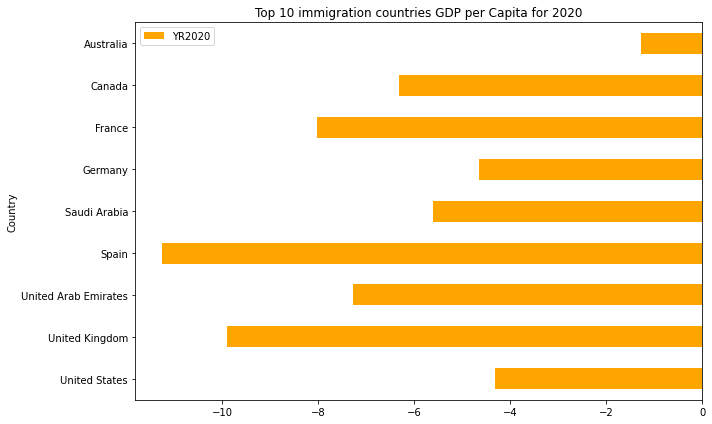

In [113]:
#Top 10 countries GDP per Capita by 2020 Bar Chart
world_gdp_p_capita_df.plot.barh(x='Country', y='YR2020',
             title='Top 10 immigration countries GDP per Capita for 2020', figsize = (10, 6), color='orange')
plt.tight_layout()

In [200]:
#Back up-------------------------------------------------------------------------------------------------
Overseas_migrant_arrivals_file = "Resources/Overseas_migrant_arrivals.csv"
Overseas_migrant_arrivals_df = pd.read_csv(Overseas_migrant_arrivals_file)
Overseas_migrant_arrivals_df

,Year,Temporary visa holders(b) ('000),Australian residents(b)(c) ('000),NZ citizens(d) ('000),Other ('000)
0,2010-11,202.57,159.17,53.61,16.44
1,2011-12,225.59,163.76,61.07,16.91
2,2012-13,244.06,163.85,54.12,20.06
3,2013-14,253.16,166.53,37.77,7.21
4,2014-15,262.93,163.17,31.75,7.40
5,2015-16,281.76,166.39,33.70,7.43
6,2016-17,314.81,185.48,32.33,7.53
7,2017-18,327.30,165.07,30.38,4.77
8,2018-19,350.67,164.29,30.54,4.90
9,2019-20,313.66,167.30,22.22,3.67


In [ ]:
#Back Up--------------------------------------------------------------------------------------------------
Overseas_migrant_departures_file = "Resources/Overseas_migrant_departures.csv"
Overseas_migrant_departures_df = pd.read_csv(Overseas_migrant_departures_file)
Overseas_migrant_departures_df